# XGBoost

**핵심 파라미터**

In [1]:
!pip install xgboost

In [46]:
# !pip install --upgrade scipy

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

iris_data = load_iris()
X_train, X_test, y_train, y_test = \
    train_test_split(iris_data.data, iris_data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))


print(classification_report(y_test,y_pred_test))


1.0
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [48]:
# 유방암 데이터셋 이진분류 
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(load_data.data, load_data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_estimators= 100,
    max_depth=5,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train,y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

print(classification_report(y_test,y_pred_test))

1.0
0.972027972027972
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [49]:

#XGBClassifier에 조기 종료 적용 -> 과적합 방지, 훈련시간 단축축
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=0,
    early_stopping_rounds=10, # 서응이 일정 횟수 이상 향상되지 않으면 조기종료(반복을 중단할 횟수)
    eval_metric='logloss'
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, random_state=0)
eval_set = [(X_tr,y_tr), (X_val, y_val)]
xgb_clf.fit(X_tr,y_tr, eval_set=eval_set, verbose=True)
# eval_set = 검증 데이터, verbose : 학습 중 평가 결과 출력 여부



[0]	validation_0-logloss:0.57481	validation_1-logloss:0.60855
[1]	validation_0-logloss:0.50967	validation_1-logloss:0.55458
[2]	validation_0-logloss:0.45738	validation_1-logloss:0.50524
[3]	validation_0-logloss:0.40999	validation_1-logloss:0.46295
[4]	validation_0-logloss:0.36974	validation_1-logloss:0.42707
[5]	validation_0-logloss:0.33525	validation_1-logloss:0.39923
[6]	validation_0-logloss:0.30479	validation_1-logloss:0.37175
[7]	validation_0-logloss:0.27762	validation_1-logloss:0.34858
[8]	validation_0-logloss:0.25423	validation_1-logloss:0.32846
[9]	validation_0-logloss:0.23342	validation_1-logloss:0.30968
[10]	validation_0-logloss:0.21391	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19718	validation_1-logloss:0.28202
[12]	validation_0-logloss:0.18261	validation_1-logloss:0.27007
[13]	validation_0-logloss:0.16971	validation_1-logloss:0.25975
[14]	validation_0-logloss:0.15828	validation_1-logloss:0.24955
[15]	validation_0-logloss:0.14647	validation_1-logloss:0.24042
[1

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

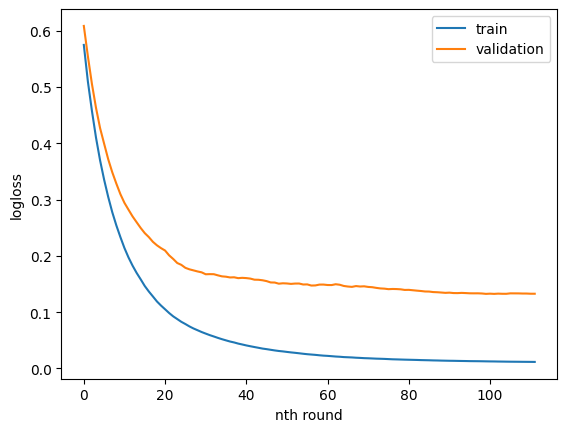

In [50]:
import matplotlib.pyplot as plt
result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss,label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.show()

In [51]:
xgb_clf.score(X_train,y_train), xgb_clf.score(X_test,y_test)

(0.9882629107981221, 0.972027972027972)

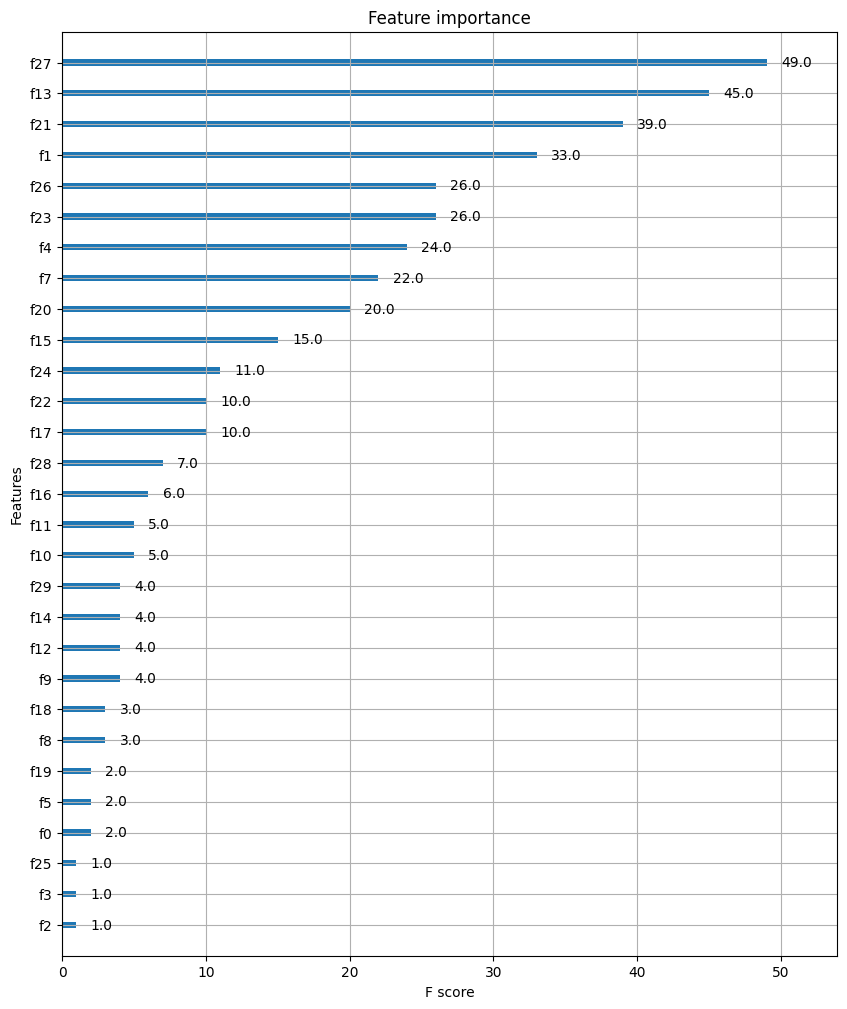

In [53]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf,ax=ax)
plt.show()